## MACHINE LARNING NOTEBOOK


In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_Naaim = pd.read_csv("Naaim_data.csv")
df_Naaim_updated = pd.read_csv("df_Naaim_monthly.csv")
df_AAii = pd.read_csv("sentiment_with_percentages.csv") 
df_UMICH = pd.read_csv("UMICH-SOC5.csv")
df_us_consumer_confidence = pd.read_csv("united-states.consumer-confidence-index.csv")
df_xlk = pd.read_csv("XLK.csv")
df_xlf = pd.read_csv("XLF.csv")
df_xlp = pd.read_csv("XLP.csv")
df_sectors = pd.read_csv("sectors.csv")

In [3]:
df_AAii['Neutral'] = df_AAii['Neutral'].str[:-1].astype(float)/100

In [4]:
# pd.set_option('display.max_rows', None)
# df_Naaim_updated = df_Naaim_updated.reset_index(drop=True)
# df_Naaim_updated.to_csv('df_Naaim_monthly.csv')

In [5]:
del df_Naaim_updated["Unnamed: 0"]
del df_Naaim_updated["Unnamed: 0.1"]

In [6]:
df_Naaim_updated = df_Naaim_updated.drop(["Date"], axis = 1)

In [7]:
df_us_consumer_confidence = df_us_consumer_confidence.reset_index(drop=True)

In [8]:
df_AAii.drop(df_AAii.index[827:], inplace=True)

In [9]:
df_AAii_updated = df_AAii.groupby(np.arange(len(df_AAii)) // 4).agg({'Reported Date':'last', 'Bullish':'mean', 'Neutral':'mean', 'Bearish':'mean'})

In [10]:
split = df_AAii_updated["Reported Date"].str.split("-", n = 2, expand = True)
df_AAii_updated["year"] = split[0]
df_AAii_updated["month"] = split[1]
df_AAii_updated["day"] = split[2]

In [11]:
df_AAii_updated_2 = df_AAii_updated.drop_duplicates(subset=["year", "month"], keep="last")

In [12]:
df_AAii_updated_2.reset_index(drop=True)
del df_AAii_updated_2["Reported Date"]
del df_AAii_updated_2["year"]
del df_AAii_updated_2["month"]
del df_AAii_updated_2["day"]

In [13]:
df_AAii_updated_2=df_AAii_updated_2.reset_index(drop=True)

In [14]:
df_xlf= df_xlf.rename(columns={'Close':'xlf_close'})
df_xlf.drop('Date',inplace=True,axis=1)
df_xlf = df_xlf.iloc[::-1].reset_index(drop=True)

In [15]:
df_xlp= df_xlp.rename(columns={'Close':'xlp_close'})
df_xlp.drop('Date',inplace=True,axis=1)
df_xlp = df_xlp.iloc[::-1].reset_index(drop=True)

In [16]:
df_xlk= df_xlk.rename(columns={'Close':'xlk_close'})
df_xlk.drop('Date',inplace=True,axis=1)
df_xlk = df_xlk.iloc[::-1].reset_index(drop=True)

In [17]:
df_sectors.drop(df_sectors.index[190:], inplace=True)

In [18]:
pd.set_option('display.max_rows', None)
df_sectors

,Date,Close XLF,Close XLK,Close XLP,xlf monthly,xlk monthly,xlp monthly,xlf average 3 month,xlk average 3 month,xlp average 3 month,Sector Result Monthly,sector result average 3 month
0,4/1/2022,34.509998,141.419998,77.639999,-9.942593946,-11.0174264,2.305969196,-3.948098583,-4.246822666,0.739759379,xlp monthly,xlp average 3 month
1,3/1/2022,38.320000,158.929993,75.889999,-0.5192108,3.154401103,1.321758309,-0.625362829,-2.855744096,-0.521699504,xlk monthly,xlp average 3 month
2,2/1/2022,38.520000,154.070007,74.900002,-1.382491004,-4.877442706,-1.408449369,0.504855338,-2.889747488,2.271934483,xlf monthly,xlp average 3 month
3,1/1/2022,39.060001,161.970001,75.970001,0.025613317,-6.844190684,-1.478407451,-0.938602384,0.219795682,2.292295267,xlf monthly,xlp average 3 month
4,12/1/2021,39.049999,173.869995,77.110001,2.871443701,3.052390925,9.702660269,1.477585906,5.226880457,3.952056951,xlp monthly,xlk average 3 month
5,11/1/2021,37.959999,168.720001,70.290001,-5.712864169,4.451186804,-1.347367018,-0.234772893,2.207655528,-0.859802177,xlk monthly,xlk average 3 month
6,10/1/2021,40.259998,161.529999,71.250000,7.274178185,8.17706364,3.5008776,3.385471717,1.910368839,-0.061078393,xlk monthly,xlf average 3 month
7,9/1/2021,37.529999,149.320007,68.839996,-2.265632694,-6.00528386,-4.732917112,0.80629939,0.480448227,-0.494389373,xlf monthly,xlf average 3 month
8,8/1/2021,38.400002,158.860001,72.260002,5.14786966,3.559326736,1.048804334,0.420856667,4.7124625,0.68782669,xlf monthly,xlk average 3 month
9,7/1/2021,36.520000,153.399994,71.510002,-0.463338797,3.887301804,2.200944659,0.295269755,3.215831033,0.927473097,xlk monthly,xlk average 3 month


In [19]:
df_sectors = df_sectors.drop(columns=['Date', 'Close XLK', 'Close XLF', 'Close XLP','xlf monthly','xlk monthly','xlp monthly'])

In [20]:
df_sectors = df_sectors.rename(columns={' xlp average 3 month':'xlp average 3 month'})
df_sectors = df_sectors.rename(columns={'Sector Result  Monthly':'Sector Result Monthly'})
df_sectors = df_sectors.rename(columns={' xlf average 3 month':'xlf average 3 month'})
df_sectors = df_sectors.rename(columns={'sector result average 3 month':'Sector result average 3 month'})

In [21]:
sector_full_data= pd.concat([df_xlk, df_xlf, df_xlp], axis=1)

In [22]:
sector_full_data

,xlk_close,xlf_close,xlp_close
0,141.419998,34.509998,77.639999
1,158.929993,38.320000,75.889999
2,154.070007,38.520000,74.900002
3,161.970001,39.060001,75.970001
4,173.869995,39.049999,77.110001
5,168.720001,37.959999,70.290001
6,161.529999,40.259998,71.250000
7,149.320007,37.529999,68.839996
8,158.860001,38.400002,72.260002
9,153.399994,36.520000,71.510002


In [23]:
full_data = pd.DataFrame()
full_data = pd.concat([df_UMICH, df_Naaim_updated, df_AAii_updated_2, sector_full_data, df_sectors], axis=1)

In [24]:
# Data conversion
full_data['xlf average 3 month'] = full_data['xlf average 3 month'].map(float)
full_data['xlk average 3 month'] = full_data['xlk average 3 month'].map(float)
full_data['xlp average 3 month'] = full_data['xlp average 3 month'].map(float)

In [25]:
full_data

,Date,Personal Finance Current,Personal Finance Expected,Business Condition 12 Months,Business Condition 5 Years,Buying Conditions,Current Index,Expected Index,Mean/Average,Bullish,Neutral,Bearish,xlk_close,xlf_close,xlp_close,xlf average 3 month,xlk average 3 month,xlp average 3 month,Sector Result Monthly,Sector result average 3 month
0,4/30/2022,98,110,62,77,80,69.4,62.5,44.0925,0.216250,0.270900,0.512800,141.419998,34.509998,77.639999,-3.948099,-4.246823,0.739759,xlp monthly,xlp average 3 month
1,3/31/2022,93,93,51,72,80,67.2,54.3,69.7775,0.263075,0.354975,0.381975,158.929993,38.320000,75.889999,-0.625363,-2.855744,-0.521700,xlk monthly,xlp average 3 month
2,2/28/2022,96,102,66,68,78,68.2,59.4,40.9925,0.250625,0.272725,0.476675,154.070007,38.520000,74.900002,0.504855,-2.889747,2.271934,xlf monthly,xlp average 3 month
3,1/31/2022,106,114,67,75,79,72.0,64.1,59.0550,0.233100,0.328750,0.438150,161.970001,39.060001,75.970001,-0.938602,0.219796,2.292295,xlf monthly,xlp average 3 month
4,12/31/2021,109,110,80,83,82,74.2,68.3,76.6900,0.278000,0.356775,0.365225,173.869995,39.049999,77.110001,1.477586,5.226880,3.952057,xlp monthly,xlk average 3 month
5,11/30/2021,110,106,73,73,79,73.6,63.5,104.3400,0.405375,0.312275,0.282350,168.720001,37.959999,70.290001,-0.234773,2.207656,-0.859802,xlk monthly,xlk average 3 month
6,10/31/2021,115,112,81,78,85,77.7,67.9,83.6075,0.375250,0.310425,0.314325,161.529999,40.259998,71.250000,3.385472,1.910369,-0.061078,xlk monthly,xlf average 3 month
7,9/30/2021,116,112,84,76,90,80.1,68.1,76.1050,0.298450,0.335575,0.366025,149.320007,37.529999,68.839996,0.806299,0.480448,-0.494389,xlf monthly,xlf average 3 month
8,8/31/2021,109,111,74,75,94,78.5,65.1,88.7250,0.382825,0.284850,0.332275,158.860001,38.400002,72.260002,0.420857,4.712462,0.687827,xlf monthly,xlk average 3 month
9,7/31/2021,116,120,109,88,102,84.5,79.0,85.1050,0.347625,0.369250,0.283150,153.399994,36.520000,71.510002,0.295270,3.215831,0.927473,xlk monthly,xlk average 3 month


<AxesSubplot:>

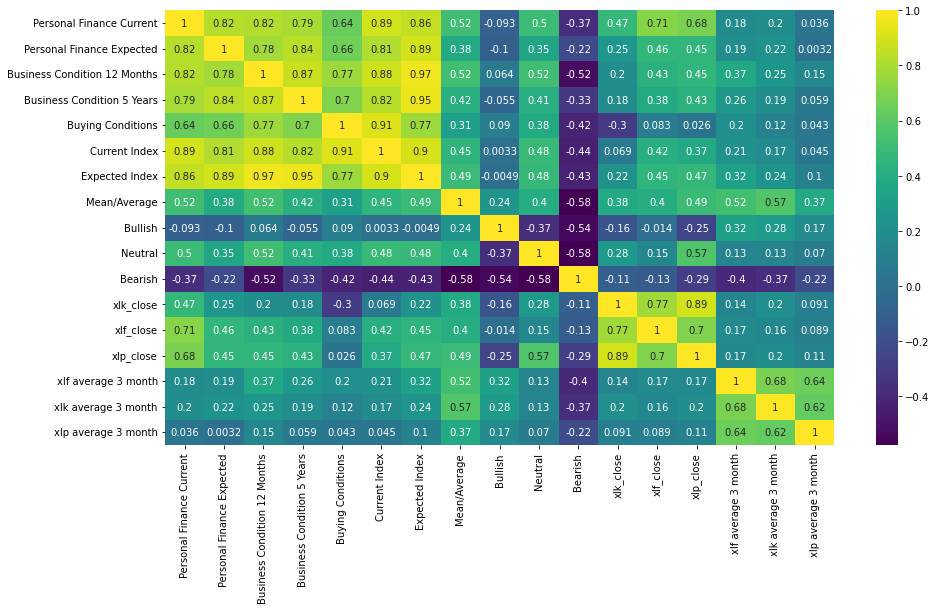

In [26]:
plt.figure(figsize=(15, 8))
sns.heatmap(full_data.corr(), annot=True, cmap='viridis')

No handles with labels found to put in legend.


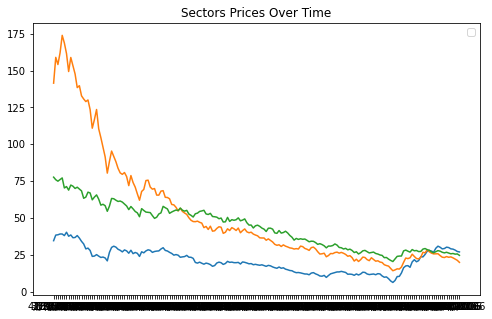

In [27]:
plt.figure(figsize=(8,5))

plt.title('Sectors Prices Over Time')

plt.plot(full_data['Date'],full_data['xlf_close'])
plt.plot(full_data['Date'],full_data['xlk_close'])
plt.plot(full_data['Date'],full_data['xlp_close'])
plt.legend()
plt.show()

[81]
[81, 58]
[81, 58, 51]


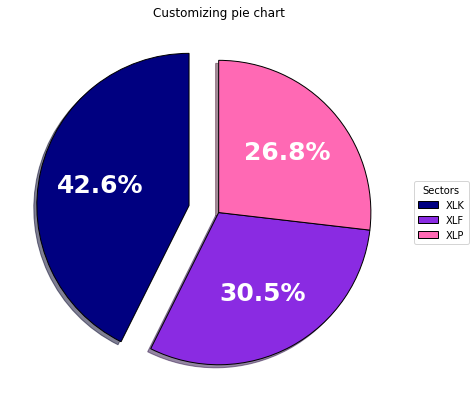

In [28]:
pie_df = pd.DataFrame()
pie_df = full_data
pie_df["Sector result average 3 month"].replace({" xlp average 3 month": 0, "xlk average 3 month": 1, " xlf average 3 month": 2}, inplace=True)

sectors = ['XLK', 'XLF', 'XLP']
 
result = []
for i in pie_df['Sector result average 3 month'].value_counts():
    result.append(i)
    print(result)
 
 
# Creating explode data
explode = (0.2, 0.0, 0.0)
 
# Creating color parameters
colors = ( "navy", "blueviolet", "hotpink")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(result,
                                  autopct = lambda pct: func(pct, result),
                                  explode = explode,
                                  labels = sectors,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="white"))
 
# Adding legend
ax.legend(wedges, sectors,
          title ="Sectors",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 25, weight ="bold")
ax.set_title("Customizing pie chart")
 
# show plot
plt.show()

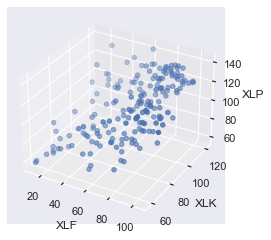

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = full_data["Mean/Average"]
y = full_data["Current Index"]
z = full_data["Personal Finance Current"]

ax.set_xlabel("XLF")
ax.set_ylabel("XLK")
ax.set_zlabel("XLP")

ax.scatter(x, y, z)

plt.show()

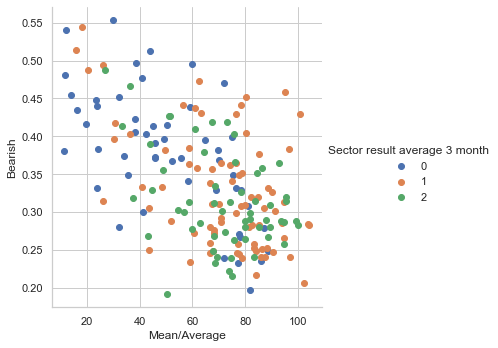

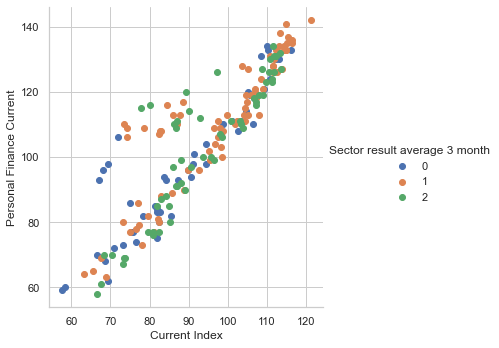

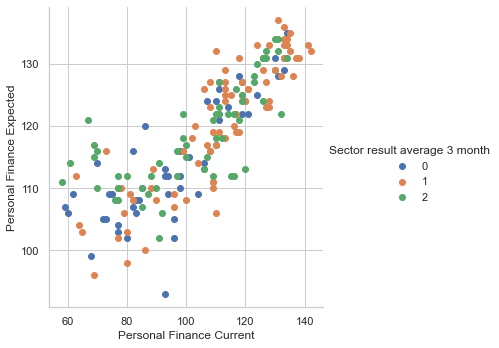

In [30]:
sns.set_style("whitegrid");
sns.FacetGrid(full_data, hue="Sector result average 3 month", height=5) \
.map(plt.scatter, "Mean/Average", "Bearish") \
.add_legend();
plt.show()

sns.set_style("whitegrid");
sns.FacetGrid(full_data, hue="Sector result average 3 month", height=5) \
.map(plt.scatter, "Current Index", "Personal Finance Current") \
.add_legend();
plt.show()

sns.set_style("whitegrid");
sns.FacetGrid(full_data, hue="Sector result average 3 month", height=5) \
.map(plt.scatter, "Personal Finance Current", "Personal Finance Expected") \
.add_legend();
plt.show()

In [31]:
# importing necessary libraries
from sklearn import metrics
from sklearn import datasets
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score,classification_report
from sklearn.model_selection import train_test_split
  
X = full_data[["Personal Finance Current","Personal Finance Expected","Current Index","Expected Index",'Mean/Average',"Bearish","xlf average 3 month", 'xlk average 3 month', 'xlp average 3 month']]
y = full_data["Sector result average 3 month"]
  
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 0)
  
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier()
dtree_model_clf = dtree_model.fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)
# print("Accuracy:",metrics.accuracy_score(y_test, dtree_predictions))
result = confusion_matrix(y_test, dtree_predictions)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, dtree_predictions)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,dtree_predictions)
print("Accuracy:",result2)

Confusion Matrix:
[[ 5  2  0]
 [ 1 15  0]
 [ 1  3 11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.75      0.94      0.83        16
           2       1.00      0.73      0.85        15

    accuracy                           0.82        38
   macro avg       0.82      0.80      0.80        38
weighted avg       0.84      0.82      0.82        38

Accuracy: 0.8157894736842105


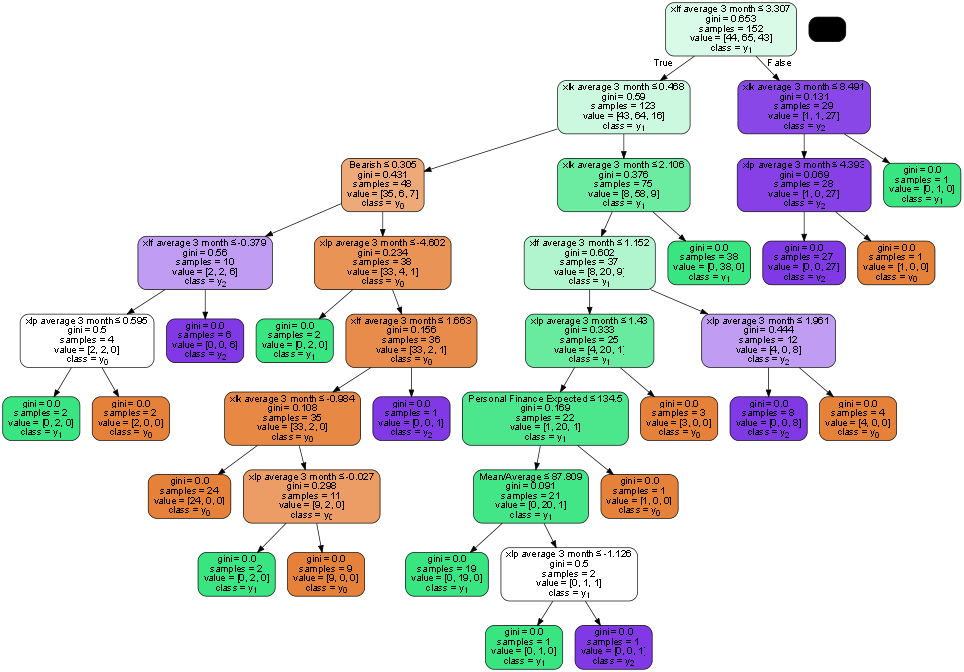

In [32]:
from sklearn.tree import export_graphviz 
from six import StringIO
from IPython.display import Image  
import pydotplus


dot_data = StringIO()
export_graphviz(dtree_model_clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
graph.set_size('"60,7!"')
graph.write_png('resized_tree.png')
Image(graph.create_png())



In [33]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
    
x_data = full_data[["Personal Finance Current","Personal Finance Expected","Current Index","Expected Index",'Mean/Average',"Bearish","xlf average 3 month", 'xlk average 3 month', 'xlp average 3 month']]
y_data = full_data["Sector result average 3 month"]
  
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data,test_size=0.2, random_state = 1)
  
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
  
# model accuracy for X_test  
accuracy = svm_model_linear.score(X_test, y_test)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)

result = confusion_matrix(y_test, svm_predictions)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, svm_predictions)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,svm_predictions)
print("Accuracy:",result2)

Confusion Matrix:
[[ 9  2  0]
 [ 0 11  0]
 [ 2  0 14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.85      1.00      0.92        11
           2       1.00      0.88      0.93        16

    accuracy                           0.89        38
   macro avg       0.89      0.90      0.89        38
weighted avg       0.90      0.89      0.90        38

Accuracy: 0.8947368421052632
